In [1]:
using Pkg
Pkg.activate(".")
Pkg.add(["Interpolations", "Plots"])

using Interpolations
using Plots
using LinearAlgebra


  Activating new project at `~/Julia-Exploration`
   Resolving package versions...
   Installed WoodburyMatrices ─ v1.0.0
   Installed AxisAlgorithms ─── v1.1.0
   Installed Ratios ─────────── v0.4.5
   Installed Interpolations ─── v0.15.1
    Updating `~/Julia-Exploration/Project.toml`
  [a98d9a8b] + Interpolations v0.15.1
  [91a5bcdd] + Plots v1.40.13
    Updating `~/Julia-Exploration/Manifest.toml`
  [79e6a3ab] + Adapt v4.3.0
  [66dad0bd] + AliasTables v1.1.3
  [13072b0f] + AxisAlgorithms v1.1.0
  [d1d4a3ce] + BitFlags v0.1.9
  [d360d2e6] + ChainRulesCore v1.25.1
  [944b1d66] + CodecZlib v0.7.8
  [35d6a980] + ColorSchemes v3.29.0
  [3da002f7] + ColorTypes v0.12.1
  [c3611d14] + ColorVectorSpace v0.11.0
  [5ae59095] + Colors v0.13.0
  [34da2185] + Compat v4.16.0
  [f0e56b4a] + ConcurrentUtilities v2.5.0
  [d38c429a] + Contour v0.6.3
  [9a962f9c] + DataAPI v1.16.0
  [864edb3b] + DataStructures v0.18.22
  [8bb1440f] + DelimitedFiles v1.9.1
  [ffbed154] + DocStringExtensions v0.9.4
  [4

81×81×25 extrapolate(interpolate((-100.0:2.5:100.0,-100.0:2.5:100.0,0.0:3.0:72.0), ::Array{Float64, 3}, Gridded(Linear())), Flat()) with element type Float64:
[:, :, 1] =
 2.0  2.0075  2.015  2.0225  2.03  2.0375  …  2.0225   2.015    2.0075  2.0
 2.0  2.0075  2.015  2.0225  2.03  2.0375     2.0225   2.015    2.0075  2.0
 2.0  2.0075  2.015  2.0225  2.03  2.0375     2.0225   2.015    2.0075  2.0
 2.0  2.0075  2.015  2.0225  2.03  2.0375     2.0225   2.015    2.0075  2.0
 2.0  2.0075  2.015  2.0225  2.03  2.0375     2.0225   2.015    2.0075  2.0
 2.0  2.0075  2.015  2.0225  2.03  2.0375  …  2.0225   2.015    2.0075  2.0
 2.0  2.0075  2.015  2.0225  2.03  2.0375     2.0225   2.015    2.0075  2.0
 2.0  2.0075  2.015  2.0225  2.03  2.0375     2.0225   2.015    2.0075  2.0
 2.0  2.0075  2.015  2.0225  2.03  2.0375     2.0225   2.015    2.0075  2.0
 2.0  2.0075  2.015  2.0225  2.03  2.0375     2.02251  2.015    2.0075  2.0
 2.0  2.0075  2.015  2.0225  2.03  2.0375  …  2.02251  2.015    2.007

In [10]:
# Velocity (km/hr)
velocity(pos::Tuple{Float64, Float64}, t::Float64) = (
    eitpU(pos[1], pos[2], t),
    eitpV(pos[1], pos[2], t)
)

function rk4_step(pos, t, h)
    u1, v1 = velocity(pos, t)
    k1 = (u1, v1)

    pos2 = (pos[1] + 0.5*h*k1[1], pos[2] + 0.5*h*k1[2])
    u2, v2 = velocity(pos2, t + 0.5*h)
    k2 = (u2, v2)

    pos3 = (pos[1] + 0.5*h*k2[1], pos[2] + 0.5*h*k2[2])
    u3, v3 = velocity(pos3, t + 0.5*h)
    k3 = (u3, v3)

    pos4 = (pos[1] + h*k3[1], pos[2] + h*k3[2])
    u4, v4 = velocity(pos4, t + h)
    k4 = (u4, v4)

    dx = (h/6)*(k1[1] + 2k2[1] + 2k3[1] + k4[1])
    dy = (h/6)*(k1[2] + 2k2[2] + 2k3[2] + k4[2])

    return (pos[1] + dx, pos[2] + dy)
end


rk4_step (generic function with 1 method)

In [11]:
dt_integrator = 0.5
dt_output = 1.0

pos = (-40.0, 0.0)
t = t0
track = [(t, pos...)]

next_out = t + dt_output

while t < tend - 1e-8
    h = min(dt_integrator, tend - t)
    pos = rk4_step(pos, t, h)
    t += h

    if t + 1e-8 >= next_out
        push!(track, (t, pos...))
        next_out += dt_output
    end
end

"Forecast track computed."


"Forecast track computed."

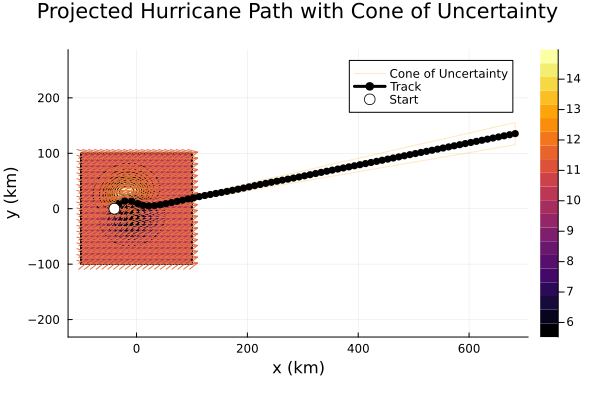

In [17]:
# -----------------------------
# Cell 6 — Visualize hurricane track with cone of uncertainty
# -----------------------------

# Compute wind speed at final time for contour shading
speed = [hypot(eitpU(x, y, tend), eitpV(x, y, tend)) for y in ys, x in xs]

# Extract track arrays
xs_tr = [x for (_, x, _) in track]
ys_tr = [y for (_, _, y) in track]
ts_tr = [t for (t, _, _) in track]

# Quiver sample grid
qx = range(xmin, xmax, length=20)
qy = range(ymin, ymax, length=20)
qu = [eitpU(x, y, tend) for y in qy, x in qx]
qv = [eitpV(x, y, tend) for y in qy, x in qx]

# Flatten for quiver
xq = repeat(collect(qx), inner=length(qy))
yq = repeat(collect(qy), outer=length(qx))
uq = vec(qu)
vq = vec(qv)

# Define cone of uncertainty radius (km) for each track point
# Typically grows with sqrt(time) or linearly. Here we use linear for simplicity:
max_radius = 20.0   # km at final time
cone_radii = max_radius * (ts_tr ./ maximum(ts_tr))

# Build polygons for cone (left/right boundaries)
cone_upper_x = xs_tr
cone_upper_y = ys_tr .+ cone_radii

cone_lower_x = reverse(xs_tr)
cone_lower_y = reverse(ys_tr .- cone_radii)

cone_x = vcat(cone_upper_x, cone_lower_x)
cone_y = vcat(cone_upper_y, cone_lower_y)

# Create contour plot
plt = contourf(xs, ys, speed;
    levels=20,
    xlabel="x (km)",
    ylabel="y (km)",
    title="Projected Hurricane Path with Cone of Uncertainty",
    aspect_ratio=:equal
)

# Overlay quiver arrows
quiver!(plt, xq, yq, quiver=(uq, vq), quiverkey=false)

# Add cone of uncertainty as semi-transparent polygon
plot!(plt, cone_x, cone_y; color=:orange, alpha=0.25, label="Cone of Uncertainty")

# Plot the track
plot!(plt, xs_tr, ys_tr; lw=3, marker=:circle, markersize=4, color=:black, label="Track")

# Highlight the starting point
scatter!(plt, [xs_tr[1]], [ys_tr[1]]; markersize=6, color=:white, markerstrokecolor=:black, label="Start")

# Display
display(plt)


# Explainations

## Cell 1: Hurricane Forecasting with RK4 and Cone of Uncertainty

This notebook simulates a hurricane's projected path using a synthetic wind field and a fourth-order Runge–Kutta (RK4) integrator. The forecast track is visualized with:

- A contour of wind speed magnitude.
- Quiver arrows showing the local wind vectors.
- The storm's projected track.
- A cone of uncertainty around the track representing forecast error growth.

The approach allows us to illustrate both the likely path and the growing uncertainty in the forecast.


## Cell 2: Synthetic Wind Field

We generate a simple, time-dependent wind field as the input for the hurricane forecast:

- `U(x,y,t)` and `V(x,y,t)` represent the eastward and northward wind velocities at grid points `(x, y)` over time `t`.
- A **background steering flow** provides a uniform drift (e.g., 10 km/hr eastward, 2 km/hr northward).
- A **Gaussian vortex** simulates the local rotating circulation of the storm. Its center can drift slowly in space and expand slightly over time.
- A small diurnal modulation is added for realism.

The wind field is stored in 3D arrays `(nx, ny, nt)` for each spatial and temporal point, and is later interpolated for arbitrary positions.


## Cell 3: Interpolation of Wind Field

We use `Interpolations.jl` to create **trilinear interpolants**:

- `eitpU(x, y, t)` and `eitpV(x, y, t)` allow us to query the wind velocity at any continuous position `(x, y)` and time `t`.
- Extrapolation outside the grid is handled with a **flat boundary**, meaning velocities beyond the grid edges are taken as the nearest edge value.
- This enables smooth evaluation during the RK4 integration step.


## Cell 4: Runge–Kutta 4th-Order (RK4) Integration

The hurricane's position is updated in time using the RK4 method:

1. Evaluate the velocity at the current position: `k1`.
2. Evaluate the velocity at the midpoint using `k1`: `k2`.
3. Evaluate the velocity at the midpoint using `k2`: `k3`.
4. Evaluate the velocity at the end using `k3`: `k4`.
5. Combine increments with weights `(1,2,2,1)/6` to compute the next position.

This method provides **4th-order accuracy**, meaning the position error decreases rapidly with smaller time steps.


## Cell 5: Forecast Track Calculation

- Start from the hurricane's initial position `(x0, y0)`.
- Iterate RK4 steps over the total forecast horizon `tend`.
- Record positions at regular output intervals (`dt_out`) for plotting.
- Resulting arrays:
  - `xs_tr` and `ys_tr` — projected positions over time
  - `ts_tr` — corresponding time points

These arrays form the **track** used to display the forecast path.


## Cell 6: Visualization

The visualization overlays multiple pieces of information:

1. **Wind speed contours**: 
   - `speed = sqrt(U^2 + V^2)` at the final forecast time.
   - Displayed with `contourf` to give context of the environment.

2. **Quiver arrows**: 
   - Sampled from the interpolated wind field at sparse grid points.
   - Represent local wind direction and magnitude.

3. **Hurricane track**: 
   - Plotted as a black line with circular markers.
   - Start point highlighted in white with black outline.

4. **Cone of uncertainty**:
   - Represents the forecast error envelope around the track.
   - Radius grows with time (linear scaling here for simplicity).
   - Constructed as a polygon by adding/subtracting the radius from track positions.
   - Plotted semi-transparent (`alpha=0.25`) to visualize likely hurricane position spread.

This combination produces a **traditional forecast plot**, showing both the most likely track and the area where the storm may deviate.
